In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 불러오기 및 개요 파악하기
basketball_df = pd.read_csv("Dataset/basketball_stat.csv")

print("data shape:", basketball_df.shape)
basketball_df.info()
basketball_df.describe()

data shape: (100, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  100 non-null    object 
 1   Pos     100 non-null    object 
 2   3P      100 non-null    float64
 3   2P      100 non-null    float64
 4   TRB     100 non-null    float64
 5   AST     100 non-null    float64
 6   STL     100 non-null    float64
 7   BLK     100 non-null    float64
dtypes: float64(6), object(2)
memory usage: 6.4+ KB


,3P,2P,TRB,AST,STL,BLK
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.00000
mean,1.08200,3.265000,5.030000,1.892000,0.725000,0.69600
std,0.91424,1.843053,3.098599,1.257357,0.343004,0.59661
min,0.00000,0.500000,1.300000,0.200000,0.000000,0.10000
25%,0.00000,1.900000,2.875000,0.975000,0.500000,0.20000
50%,1.30000,2.900000,3.900000,1.500000,0.700000,0.55000
75%,1.80000,4.450000,6.325000,2.600000,0.925000,1.00000
max,3.40000,9.700000,14.100000,5.900000,1.600000,3.00000


In [8]:
# 데이터 전처리
basketball_sorted = basketball_df.sort_values(by=['Pos'], ascending=False) # 'Pos' 기준으로 내림차순으로 정렬
basketball_2P_new = basketball_sorted['2P'] * (-1)
basketball_sorted.append(basketball_2P_new)

,Player,Pos,3P,2P,TRB,AST,STL,BLK,0,1,...,90,91,92,93,94,95,96,97,98,99
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,E'Twaun Moore,SG,1.1,2.8,2.1,2.2,0.7,0.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,Tim Hardaway,SG,1.9,3.4,2.8,2.3,0.7,0.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,Gary Harris,SG,1.9,3.7,3.1,2.9,1.2,0.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,Joe Harris,SG,1.6,1.3,2.8,1.0,0.6,0.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Ian Mahinmi,C,0.0,2.1,4.8,0.6,1.1,0.8,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,JaVale McGee,C,0.0,2.7,3.2,0.2,0.2,0.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,Marcin Gortat,C,0.0,4.8,10.4,1.5,0.5,0.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,Al Horford,C,1.3,4.3,6.8,5.0,0.8,1.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Position별 Boolean 인덱싱으로 numpy array 생성
SG = np.array(basketball_sorted[basketball_sorted["Pos"] == 'SG']) # Shooting Guard 인덱싱
C = np.array(basketball_sorted[basketball_sorted["Pos"] == 'C']) # Center 인덱싱

In [5]:
# 각 Column들에 대해 numpy로 array 생성
Pos = np.array(basketball_df["Pos"])
Point_3 = np.array(basketball_df["3P"])
Point_2 = np.array(basketball_df["2P"])

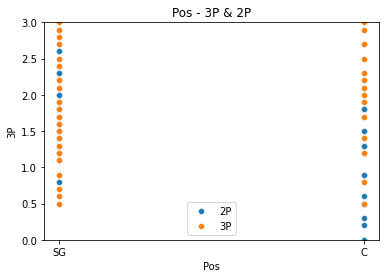

In [6]:
# Position별 3점, 2점 분포
sns.scatterplot(x='Pos', y='3P', data=basketball_sorted)
sns.scatterplot(x='Pos', y='2P', data=basketball_sorted)
plt.legend(['2P', '3P']) # 범례 표시
plt.ylim((0, 3)) # y축 구간을 0 ~ 3으로 scaling
plt.title("Pos - 3P & 2P")
plt.show()

In [7]:
# Position별 3점, 2점 분포
sns.scatterplot(x='Pos', y='', data=basketball_sorted)
sns.scatterplot(x='Pos', y='', data=basketball_sorted)
plt.legend(['2P', '3P']) # 범례 표시
plt.ylim((0, 3)) # y축 구간을 0 ~ 3으로 scaling
plt.title("Pos - 3P & 2P")
plt.show()

ValueError: Could not interpret value `` for parameter `y`

In [ ]:
# Heatmap 작성하기
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(basketball_df,
                 cmap = "Blues",
                 annot=True,
                 fmt=".2f",
                 linewidths=2)